In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: covariance is not positive-semidefinite.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: covariance is not positive-semidefinite.
  This is separate from the ipykernel package so we can avoid doing imports until


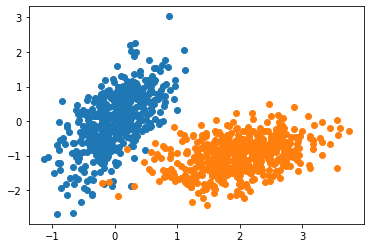

In [ ]:
number_of_samples = 500
X0, Y0 = np.random.multivariate_normal([0,0], [[0.1, 0.5], [0.2, 0.4]], number_of_samples).T
X1, Y1 = np.random.multivariate_normal([2,-1], [[0.2, 0.3], [0.4, 0.1]], number_of_samples).T
plt.scatter(X0, Y0)
plt.scatter(X1, Y1)
data = np.concatenate((np.stack((X0, Y0, np.zeros(number_of_samples)), axis=1), 
                       np.stack((X1, Y1, np.ones(number_of_samples)), axis=1))).astype('float32')
np.random.shuffle(data)
X_train = data[:-10,:2]
y_train = data[:-10,2].reshape(-1,1)

X_test = data[-10:,:2]
y_test = data[-10:,2].reshape(-1,1)

In [ ]:
class MyModel(tf.Module):
  def __init__(self, **kwargs):
    super().__init__(**kwargs)
    self.theta = tf.Variable(np.random.uniform(-1,1,size = [1,2]).astype('float32'))
    self.c = tf.Variable(np.random.uniform(-1, 1,size = [1]).astype('float32'))

  def __call__(self, x):
    return tf.math.sigmoid(tf.matmul(x, self.theta, transpose_b = True) + self.c)


In [ ]:
def L(y_true, y_predicted):
  return tf.math.reduce_sum(y_true * tf.math.log(y_predicted+1e-9) + (1 - y_true) * tf.math.log(1 - y_predicted+1e-9))

In [ ]:
def train(model, x, y, learning_rate = 0.1):
  with tf.GradientTape() as tape:
    current_likelihood = L(y, model(x))
  
  d_theta, d_c = tape.gradient(current_likelihood, [model.theta, model.c])

  model.theta.assign_add(learning_rate * d_theta)
  model.c.assign_add(learning_rate * d_c)
  return current_likelihood

In [ ]:
def training_loop(model, x, y, epochs, alpha):
  for epoch in range(1, epochs+1):
    likelihood = train(model, x, y, learning_rate = alpha)
    if epoch %500 == 0:
      print(likelihood)

In [ ]:
model = MyModel()
training_loop(model, X_train, y_train, 5000, 0.001)


tf.Tensor(-25.524818, shape=(), dtype=float32)
tf.Tensor(-21.23027, shape=(), dtype=float32)
tf.Tensor(-19.61467, shape=(), dtype=float32)
tf.Tensor(-18.765451, shape=(), dtype=float32)
tf.Tensor(-18.247225, shape=(), dtype=float32)
tf.Tensor(-17.902632, shape=(), dtype=float32)
tf.Tensor(-17.660295, shape=(), dtype=float32)
tf.Tensor(-17.483015, shape=(), dtype=float32)
tf.Tensor(-17.34946, shape=(), dtype=float32)
tf.Tensor(-17.246548, shape=(), dtype=float32)


In [ ]:
np.round(model(X_test)).reshape(10), y_test.reshape(10)

(array([1., 1., 1., 1., 1., 1., 0., 0., 0., 0.], dtype=float32),
 array([1., 1., 1., 1., 1., 1., 0., 0., 0., 0.], dtype=float32))